## Building a working data table

In [1]:
#imports
import numpy as np
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import os
import pytz
import datetime
from datetime import datetime as dt, timedelta
from astropy.time import Time
from datetime import datetime, date, time, timezone
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import time

#my own files:
from pipeline.code.data_table import *
#from wp_pipeline import *
#from datetime_formats import * # datetimes now in data_table

# what we need as inputs:
date = "20200121"
run_input = "/home/emcewen/data/runs/"
fits_out_p = "/home/emcewen/out/"+date+"/"
fits_in_p = "/home/imaka/data/"+date+"/ao/"
wind_CFHT_p = "/home/emcewen/data/wind_cfht/"
wind_250_p = "/home/emcewen/data/wind_250mb/"
soundings_p = "/home/emcewen/data/mass_dimm_table.csv"

/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/emcewen/.local/lib/python3.6/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3

In [26]:
#Quick graph test for paper

#pull data
df_main = pd.read_csv("csv/main_cfht_250.csv", memory_map=True)

#filters
rslt_df = df_main[df_main['ttsub'] == True]
rslt_df = rslt_df.drop_duplicates(subset=['dataname'])
df_input = rslt_df[rslt_df['cft_wspd'] > 2]

df_input["cft_avg_wspd"] = df_input["cft_avg_wspd"] * 0.5144447
df_input["250_wspd"] = df_input["250_wspd"] * 0.5144447


/home/emcewen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/emcewen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [23]:
# whats the range of sampling rates:
df_main = pd.read_csv("csv/main_cfht_250.csv", memory_map=True)
df_main = df_main[df_main['FSAMPLE'] > 5]

minValue = df_main['FSAMPLE'].mean()
print(minValue)

164.84383087543145


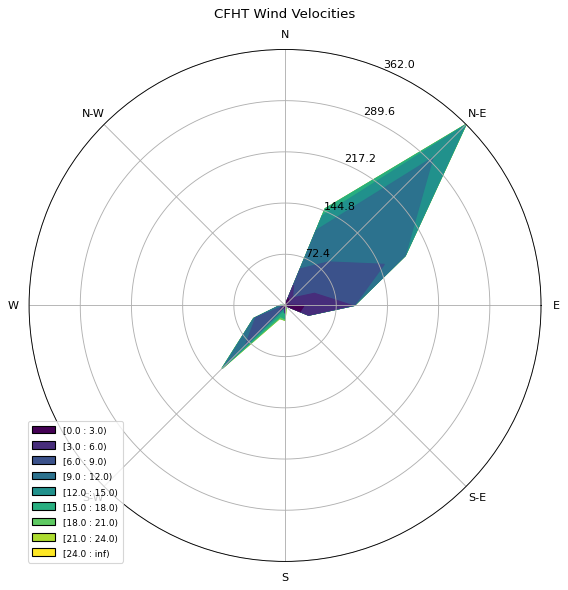

In [31]:
# Windplot for CFHT data
ws = df_input["cft_avg_wspd"].tolist()
wd = df_input["cft_avg_wdir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 25, 3), cmap=cm.viridis)
ax.set_legend()
ax.set_title("CFHT Wind Velocities")
plt.savefig('windplot_main_cfht_2.png',  dpi=300)

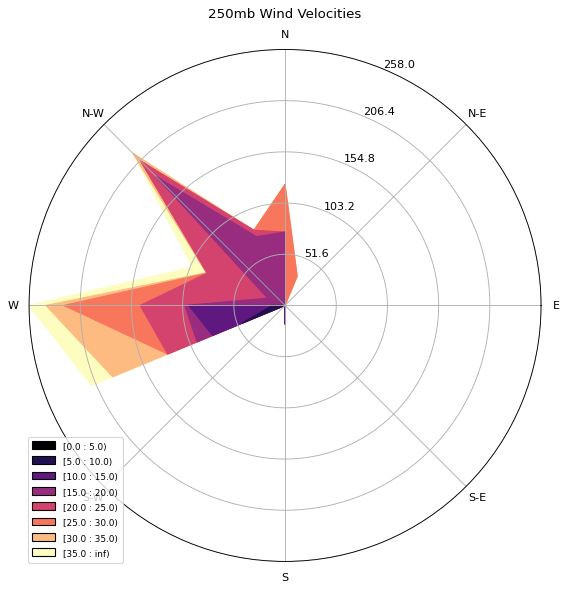

In [35]:
# Windplot for CFHT data
ws = df_input["250_wspd"].tolist()
wd = df_input["250_wdir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 40, 5), cmap=cm.magma)
ax.set_legend()
ax.set_title("250mb Wind Velocities")
plt.savefig('windplot_main_250_2.png',  dpi=300)

## Functions for things needed
- Wind_cfht (every minute or so?)
--Speed
--Direction angle or component
--year month day hour minute(HST) wind_speed(kts) wind_direction(dec) temperature(C) relative_humidity(%) pressure(mb-if present)
-Wind_250 (mb prediction)
--Speed 
--Direction angle 
-Soundings (1once a night)
-MASS (every 5min)
--Flag: MASS averaged?
-DIMM (every 5min)
--Flag: DIMM averaged?
-Computed ground layer

Notes from chat with Mark:

Don't call in file, sort on datetime, just run
        

#from datetime import datetime, timezone
#tz = timezone(-10) 
#the timezone object takes the offset from UTC as it's argument
#dtest = datetime(year, month, day, etc..., tzinfo=tz) 
#Or some other method like str_to_datetime(), just something that creates the datetime object

In [17]:
# first buiding and then applying cfht to csv files

# then building and applying the GFS data to csv files 


# WFS / CircBuff Data
all of the data from our fits files
- Run#
-Date
-time
-In_fits (circular buffer)
-Out_fits (cross corr location)
-WFS# (0-4 available)
-Exposures / times 
-Update rate
-Ra
-Dec

pass into this function... like maybe the list of out_fits?



In [ ]:
### EXAMPLE!!!
# How data_out_fits works
# given an output fits files

out_fits = ["/home/emcewen/out_test/20200122/fits/20200122_aocb0059o_tmax20_raw.fits"]
df_test = data_out_fits(out_fits)
# print("Dataframe Contens ", df_test, sep='\n')

In [9]:
##### MAIN FUNCTION!!! 
##### THIS TAKES LIKE 5 MINUTES DON'T USE LIGHTLY

#building up all the runs in the given runfile
files = os.listdir(run_input)
# generate a list of all the .txt files in run directory
run_files = [run_input + fn for fn in files if fnmatch.fnmatch(fn, 'RUN*.txt')]

#generates the DF!!! send in all the run files you'd like to use
df_main = df_gen_main(run_files, run_in, out_dir)


df_main.to_csv("csv/main.csv")

In [4]:
### ADDITIONAL RUN
run_files = ["/home/emcewen/imaka_wfp/inputs/runs/RUN12.txt"]
run_in = "/home/emcewen/imaka_wfp/inputs/runs/"
out_dir = "/home/emcewen/out/"

df_run = df_gen_main(run_files,run_in, out_dir)

In [24]:
## testing
# want to creat a df for a run file from the csv created
df_runin = pd.DataFrame()

df_runin["Date"] = df_run["OBSDATE"]
df_runin["Name"] = df_run["dataname"].str[9:]

In [35]:
df_runin = df_runin.drop_duplicates()
df_runin = df_runin.sort_values(['Date', 'Name'])

In [36]:
df_runin

,Date,Name
80,20210429,aocb0002o
0,20210429,aocb0005o
245,20210429,aocb0006o
30,20210429,aocb0009o
5,20210429,aocb0011o
...,...,...
1470,20210503,aocb0041o
1445,20210503,aocb0043o
1485,20210503,aocb0047o
1400,20210503,aocb0049o


In [37]:
df_runin.to_csv("csv/sort_run12.csv")

## CFHT DATA
format:

year 
month 
day 
hour 
minute(HST) 
wind_speed(kts) 
wind_direction(dec) 
temperature(C) 
relative_humidity(%) 
pressure(mb-if present)

example line:
2020 01 01 00 00 26 38 1.01 22 618.6 0.00


In [ ]:
#going through all files, converting to a convenient csv

CFHT_NAMES = ['year', 'month', 'day', 'hour', 'minute', 'wind_speed(kts)', 
              'wind_direction(dec)', 'temperature(C)', 'relative_humidity(%)', 'pressure(mb-if present)']

years = ['2016', '2017', '2018', '2019', '2020', '2021']

for year in years:
    wind_CFHT = wind_CFHT_p + "cfht-wx.{}.dat".format(year)
    df = pd.read_csv(wind_CFHT, sep = ' ', names = CFHT_NAMES, index_col=False)
    
    df["pre_datetime"] = df['year'].astype(str) +'/'+ df['month'].astype(str) +'/'+ df['day'].astype(str) +" "+ df['hour'].apply('{0:0>2}'.format).astype(str)+':'+ df['minute'].apply('{0:0>2}'.format).astype(str)
    df["datetime"] = pd.to_datetime(df["pre_datetime"])
    df["datetime"] = df["datetime"].apply(hst_to_utc)
    
    df.drop(['year', 'month', 'day', 'hour', 'minute','pre_datetime'], axis=1, inplace=True)
    df.to_csv(wind_CFHT.replace(".dat", '.csv').replace(wind_CFHT_p, "csv/cfht"), index=False)


In [4]:
year = 2017
wind_CFHT = wind_CFHT_p + "cfht-wx.{}.csv".format(year)
df_wind = pd.read_csv(wind_CFHT)
print(df_wind["datetime"])

0         2017-01-01 10:00:00+00:00
1         2017-01-01 10:01:00+00:00
2         2017-01-01 10:02:00+00:00
3         2017-01-01 10:03:00+00:00
4         2017-01-01 10:04:00+00:00
                    ...            
522611    2018-01-01 09:55:00+00:00
522612    2018-01-01 09:56:00+00:00
522613    2018-01-01 09:57:00+00:00
522614    2018-01-01 09:58:00+00:00
522615    2018-01-01 09:59:00+00:00
Name: datetime, Length: 522616, dtype: object


In [10]:
### Starting a test run

df_test = pd.read_csv("csv/20200121.csv")
dtest = df_test.loc[0, 'DATETIME']
d_utc_test = str_to_utc(dtest)

df_test["DATETIME"] = pd.to_datetime(df_test["DATETIME"])

df_cfht = data_wind_cfht(df_test['DATETIME'].to_list(), wind_CFHT_p)
 
#merged = pd.merge(df_test, df_cfht)

concatenated = pd.concat([df_test, df_cfht], axis=1, how='inner')
#df_test = pd.merge(df_test, df_cfht, how="left", on=["DATETIME"])
#df_test = df_test.append(data_wind_cfht([d_utc_test], wind_CFHT_p), ignore_index=True)
print(concatenated[['dataname', 'DATETIME', "cft_windspeed"]])
#print(merged)

              dataname            DATETIME cft_windspeed
0   20200121_aocb0001o 2020-01-21 10:56:10            14
1   20200121_aocb0001o 2020-01-21 10:56:10            14
2   20200121_aocb0001o 2020-01-21 10:56:10            14
3   20200121_aocb0001o 2020-01-21 10:56:10            14
4   20200121_aocb0001o 2020-01-21 10:56:10            14
..                 ...                 ...           ...
70  20200121_aocb0005o 2020-01-21 11:00:31            12
71  20200121_aocb0005o 2020-01-21 11:00:31            12
72  20200121_aocb0005o 2020-01-21 11:00:31            12
73  20200121_aocb0005o 2020-01-21 11:00:31            12
74  20200121_aocb0005o 2020-01-21 11:00:31            12

[75 rows x 3 columns]


In [2]:
##################### THIS GENERATES MAIN_cfht
#################### Expect it to take up to half an hour
# Now running a loop on all date-time data 

# pull main data
df_main = pd.read_csv("csv/main.csv")
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])


#### WARNING: This function takes a lot of time ######
df_cfht = data_wind_cfht(df_main['DATETIME'].to_list(), wind_CFHT_p)

# for each date, get two values back
df_main_CFHT = pd.concat([df_main, df_cfht], axis=1, join="inner")

#print(df_main[['dataname', 'DATETIME','cfht_dt', "cft_wdir"]])
#store genereated csv file
df_main_CFHT.to_csv("csv/main_cfht.csv", index=False)

KeyError: "['cft_windspeed'] not in index"

In [14]:
# checking on the number of duplications:
df_main = pd.read_csv("csv/main.csv")

df_main = df_main.drop(df_main.columns[0], axis=1)
len(df_main.index)

#df_main[df_main.dataname == '20180821_aocb0106o']


16823

In [11]:
# checking on the number of duplications:
df_main_cfht = pd.read_csv("csv/main_cfht.csv")

df_main_cfht = df_main_cfht.drop(df_main.columns[0], axis=1)

len(df_main_cfht.index)

16823

## 250mb Predictions

file names: 

In [63]:
#importing 250mb
datehour = "2018030100"
filename = wind_250_p+"gfs.{}.wdir.txt".format(datehour)

############# Generating 250mb csv ############
#for all files in wind_250_p 
files = os.listdir(wind_250_p)
#wind speeds
spd_files = [wind_250_p + fn for fn in files if fnmatch.fnmatch(fn, 'gfs.*.wspd.txt')]
#wind directions
dir_files = [wind_250_p + fn for fn in files if fnmatch.fnmatch(fn, 'gfs.*.wdir.txt')]


#df_250_t = pd.read_csv(filename, sep = ' ', index_col=False)
df_250_t = pd.read_fwf(filename, index_col=False)

In [64]:
#### Some sanity checks #####
spd_file = filename = wind_250_p+"gfs.2020012206.wdir.txt"
df_s = pd.read_fwf(spd_file, memory_map=True, index_col=False)
math.isnan(df_s.iloc[0]["250"])
#print(df_s.iloc[0]["250"])
#print(df_s)

True

In [65]:
################# Generating 250mb file ################
#creating pandas structure
#NAMES_250 = ['250_datetime', '250_wspd', '250_wdir']
df_250 = pd.DataFrame()

#for every file, pull the two corresponding dates
for i in range(len(spd_files)):
    spd_file = spd_files[i]
    datehour = spd_file.replace(wind_250_p, "").replace("gfs.", "").replace(".wspd.txt","")
    dir_file = wind_250_p+"gfs.{}.wdir.txt".format(datehour)
    df_d = pd.read_fwf(dir_file, memory_map=True, index_col=False)
    df_s = pd.read_fwf(spd_file, memory_map=True, index_col=False)
    di = 0
    si = 0
    dh  = datetime.strptime(str(datehour), "%Y%m%d%H")
    if math.isnan(df_d.iloc[di]["250"]) or math.isnan(df_s.iloc[si]["250"]): 
        di = 1
        si = 1
        dh = dh + timedelta(hours=1)
    dt_dic = {'250_datetime': dh,
                  '250_wspd': df_s.iloc[si]["250"], '250_wdir': df_d.iloc[di]["250"],
              '200_wspd': df_s.iloc[si]["200"], '200_wdir': df_d.iloc[di]["200"],
              '150_wspd': df_s.iloc[si]["150"], '150_wdir': df_d.iloc[di]["150"],
              '100_wspd': df_s.iloc[si]["100"], '100_wdir': df_d.iloc[di]["100"],
              '600_wspd': df_s.iloc[si]["600"], '600_wdir': df_d.iloc[di]["600"],
              '550_wspd': df_s.iloc[si]["550"], '550_wdir': df_d.iloc[di]["550"],
              '500_wspd': df_s.iloc[si]["500"], '500_wdir': df_d.iloc[di]["500"],
              '450_wspd': df_s.iloc[si]["450"], '450_wdir': df_d.iloc[di]["450"],
              '400_wspd': df_s.iloc[si]["400"], '400_wdir': df_d.iloc[di]["400"],
              '350_wspd': df_s.iloc[si]["350"], '350_wdir': df_d.iloc[di]["350"],
              '300_wspd': df_s.iloc[si]["300"], '300_wdir': df_d.iloc[di]["300"]
        }
    df_250 = df_250.append(dt_dic, ignore_index=True)
#df_250["250_datetime"] = pd.to_datetime(df_250["250_datetime"], format ="%Y%m%d%H")
df_250.to_csv("csv/wind_250.csv", index=False)

In [2]:
################# adding to main file ################
# connect generate 250 data with current main table
def data_wind_250(datetimes, wind250_cvs):
    df_250 = pd.DataFrame()
    # open csv file
    df = pd.read_csv(wind250_cvs)
    df.index = pd.to_datetime(df['250_datetime'])
    df = df.groupby(level=0).first()
    for dt in datetimes:
        #getting the specific row
        spot = df.index.get_loc(dt, method='nearest')
        df_250 = df_250.append(df.iloc[spot], ignore_index=True)
        #print(df_250)
    return df_250

In [3]:
# Now running a loop on all date-time data 
# pull main data
df_main = pd.read_csv("csv/main_cfht.csv", index_col=0)
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])

## creating df to pull in data from 
df_250 = data_wind_250(df_main['DATETIME'].to_list(), "csv/wind_250.csv")

# for each date, get two values back
df_main_250 = pd.concat([df_main, df_250], axis=1)

#print(df_main[['dataname', 'DATETIME', '250_dt', "250_wspd",  "250_wdir"]])
#print(df_main)

In [4]:
df_main_250.to_csv("csv/main_cfht_250.csv")

## MASS/DIMM Data
Only one file to connect

# Cleaning up Data

## Sounding Data
This is harder, is an HTML file???

# PLOTSSSSS

In [32]:
#plotting number
df_n = df_main.loc[:, 'dataname':'OBSDATE']
df_n.groupby('OBSDATE').count().plot(kind ='bar', title='Data points per date', figsize=(10,5))

In [33]:
#plotting number
df_n = df_main[['dataname', 'targetfile']]
df_n.groupby('targetfile').count().plot(kind ='bar', title='Data points per targetfile', figsize=(10,5))

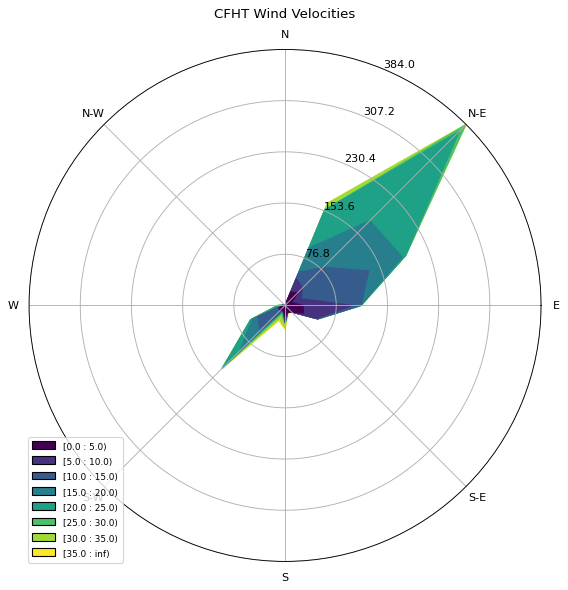

In [51]:
# Windplot for CFHT data

df_main = pd.read_csv("csv/main_cfht.csv")
#df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])
df_main = df_main[['cft_avg_wspd', 'cft_avg_wdir', "dataname"]].drop_duplicates()
ws = df_main["cft_avg_wspd"].tolist()
wd = df_main["cft_avg_wdir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 40, 5), cmap=cm.viridis)
ax.set_legend()
ax.set_title("CFHT Wind Velocities")
plt.savefig('windplot_main_cfht_1.png')

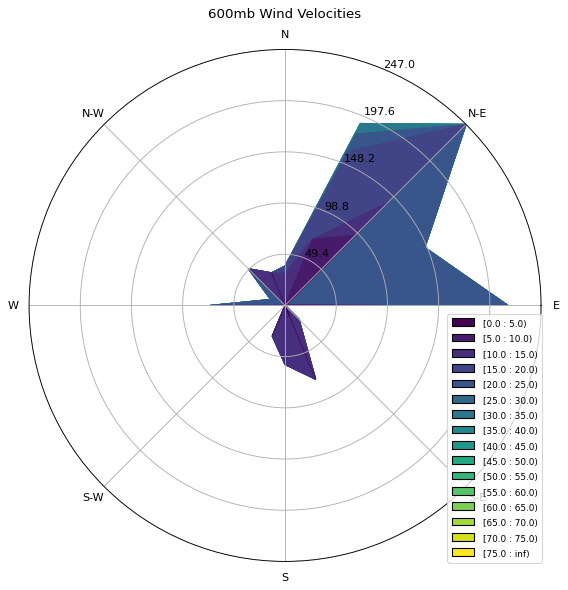

In [3]:
# Windplot for 250 data
mb ="600"

df_main = pd.read_csv("csv/main_cfht_250.csv")
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])
df_wind = df_main[["{}_wspd".format(mb), "{}_wdir".format(mb), "dataname"]].dropna().drop_duplicates()
ws = df_wind["{}_wspd".format(mb)].tolist()
wd = df_wind["{}_wdir".format(mb)].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 80, 5), cmap=cm.viridis)
ax.set_legend(loc="lower right")
ax.set_title("{}mb Wind Velocities".format(mb))
plt.savefig('windplot_main_{}_paper.png'.format(mb))

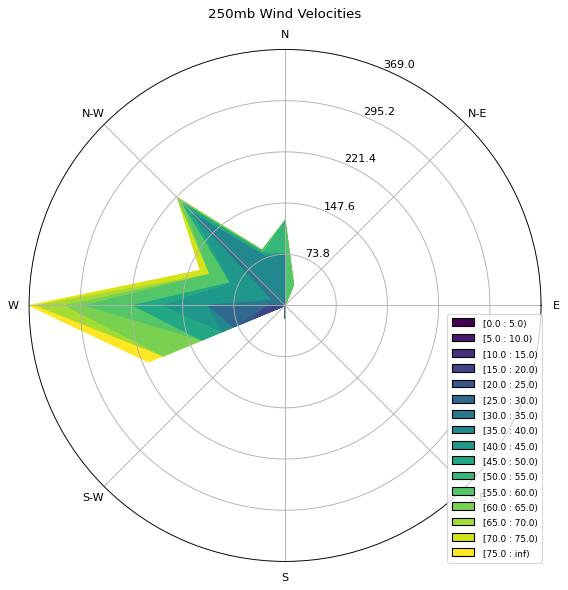

In [49]:
# Windplot for 250 data

df_main = pd.read_csv("csv/main_cfht_250.csv")
df_main["DATETIME"] = pd.to_datetime(df_main["DATETIME"])
df_wind = df_main[["250_wspd", "250_wdir", "dataname"]].dropna().drop_duplicates()
ws = df_wind["250_wspd"].tolist()
wd = df_wind["250_wdir"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 80, 5), cmap=cm.viridis)
ax.set_legend(loc="lower right")
ax.set_title("250mb Wind Velocities")
plt.savefig('windplot_main_250_paper.png')

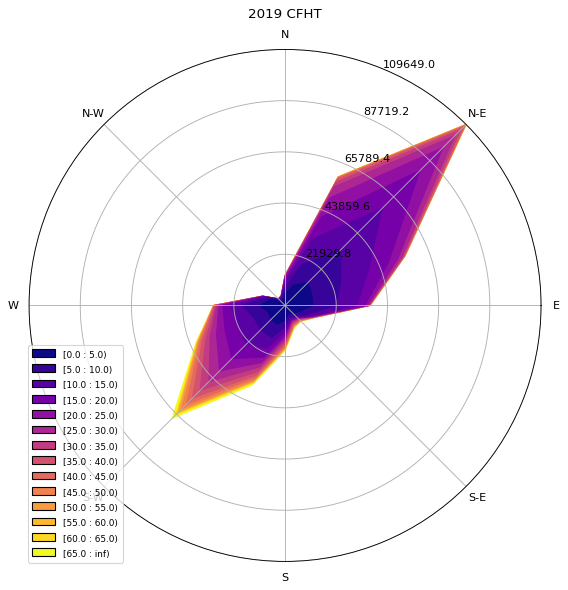

In [50]:
year = '2019'

df_main = pd.read_csv(wind_CFHT_p +"cfht-wx.{}.csv".format(year), memory_map=True)

ws = df_main["wind_speed(kts)"].tolist()
wd = df_main["wind_direction(dec)"].tolist()

ax = WindroseAxes.from_ax()
ax.contourf(wd, ws, bins=np.arange(0, 70, 5), cmap=cm.plasma)
ax.set_legend()
ax.set_title("{} CFHT".format(year))
plt.savefig('windplot_cfht_{}.png'.format(year))